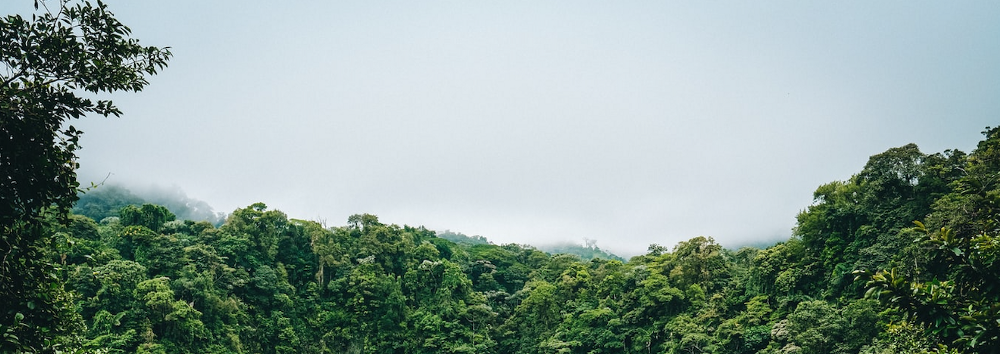

# Understanding the Amazon from Space w/ Multi Label Classification 🌴

> ### 📌 Table of Contents:
i. About the Dataset
     * Understanding the dataset
ii. Computer Vision; Conv Net architectures
     * VGG-19
     * AlexNet
     * Inceptionv3
     * Transfer Learning
iii. Amazon Satellite ML Classification model
     * Data Visualization + Exploration
     * Preprocessing
     * Model
     * Side note about Performance
iv. Conclusion

## About the Dataset
### Understanding the Dataset

This is a competition dataset that was contributed by Planet. The dataset contains training csv files and train/test images of satellite image chips of the Amazon rainforest. 

The challenge that was presented is to create a model that label these images based on atmospheric conditios and land usage with the over arching goal of tracking the human carbon foot-print on the world's largest rainforest. 

You can find the original competition dataset [here](http://www.kaggle.com/c/planet-understanding-the-amazon-from-space) and a new version created by @nik as the initial one was difficult to load into the kernel [here](http://www.kaggle.com/nikitarom/planets-dataset.) 

Side note: I've also written a Medium article about this project. You can read about it [here](http://towardsdatascience.com/understanding-the-amazon-rainforest-with-multi-label-classification-vgg-19-inceptionv3-5084544fb655)!

The image chips were sourced from 4-band satellites in sun-synchronous orbit and International Space Station orbit.

The labels are not mutually exclusive and can be classified as: artisinal mine, conventional mine, partly-cloudy, habitation, bare ground, blooming, selective logging, road, cultivation, water, agriculture, haze, primary, blowdown, cloudy, clear, and/or slash-burn.

For a better understanding of what each of these labels are representing visit [here](https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data)

## Conv-net Architectures

### VGG-16 

VGG-19 is a convolutional neural network architecture developed by the Visual Geometry Group; it became more well-versed in the computer vision community after being named the runner-up of the 2014 ILSVRC classification task. It is often associated with VGG-16 with the difference being that VGG-19 has 19 layers with trainable weights rather than 16, hence the name.


### AlexNet

AlexNet; authored by Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton is best known for winning the ILSVRC 2012 competition by an immense error margin and can be credited with stimulating the rise in popularity of convolutional neural networks.

### Inceptionv3

Inceptionv3, as the name suggests, is the third variation of the Inception convolutional neural network. Inceptionv3 builds upon the foundations of its predecessors Inception and Inceptionv2.


### Transfer Learning

Transfer Learning is a method used in machine learning where knowledge (learnable parameters like weights and biases) from one model that was pre-trained can be leveraged in another model with the benefits being:
* Faster training time
* Improved performances in applications where data is limited.
* Better generalization; prevents overfitting.

Simply put, it’s the use of a model that was already trained on a specific dataset and can now be applied to another problem.
Generally, transfer learning is best put to use when the data you have is limited and in scarce quantity or the problem lies in the domain of the data that the model was previously trained on.

## Amazon Satellite ML Classification Model

### Data Visualization + Exploration

In [ ]:
import pandas as pd
import os

root = "../input/planets-dataset/planet/planet/"

csvPath = os.path.join(root + "train_classes.csv")
trainImages = os.path.join(root + "train-jpg")
testImages = os.path.join(root + "test-jpg")

df = pd.read_csv(csvPath)

df.head(10)
print(df.shape)

l = set()

for tag in df['tags'].values:
    labels = tag.split(' ')
    l.update(labels)
    
print(l)

In [ ]:
df.shape

In [ ]:
import re

labels = df['tags']

def valueSearch(pattern):
    count = []
    num = 0
    for label in labels:
        x = re.search(pattern, label)
        if x:
            count.append(label)
    for c in count:
        num += 1
    return num

def showLabels(pattern):
    for label in labels:
        x = re.search(pattern, label)
        if x:
            print(label)

In [ ]:
showLabels(r"^[\S]+$") # values with one label

In [ ]:
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with six labels

In [ ]:
showLabels(r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$") # values with nine labels

Note: this dataset does not contain any images that have more than nine labels. 

In [ ]:
import matplotlib.pyplot as plt

patternList = [r"^[\S]+$", r"^[^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$",
              r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", r"^[^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]* [^ ]*$", ]
    
valueList = []
chartLabels = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

for p in patternList:
    valueList.append(valueSearch(p))

fig, ax = plt.subplots()
ax.bar(chartLabels, valueList)
ax.set_xticklabels(chartLabels, rotation=90)
plt.title("Distribution of Number of Labels")
plt.show()

Most of the images have two labels, three and four labels are pretty equal in number and one, five, and six labels don't appear too frequently. Images that can be classified under seven, eight, or nine labels rarely appear in the dataset. Interesting; there is quite an imbalance here.

Moving on, it's a good idea to visualize some of the images to gain insight into what these labels should look like:

In [ ]:
import cv2
    
def showImages(imgid,imgid2, imgid3, imgid4, imgid5):
    plt.figure(figsize=(20,20))
    plt.subplot(6,6,1)
    img = cv2.imread(trainImages + "/train_" + imgid)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.subplot(6,6,1+1)
    img2 = cv2.imread(trainImages + "/train_" + imgid2)  
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    plt.subplot(6, 6,1+2)
    img3 = cv2.imread(trainImages + "/train_" + imgid3)
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
    plt.imshow(img3)
    plt.subplot(6, 6, 1+3)
    img4 = cv2.imread(trainImages + "/train_" + imgid4)
    img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    plt.imshow(img4)
    plt.subplot(6, 6, 1+4)
    img5 = cv2.imread(trainImages + "/train_" + imgid5)
    img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
    plt.imshow(img5)
    
showImages("0.jpg", "1.jpg", "2.jpg", "3.jpg", "4.jpg")
showImages("5.jpg", "6.jpg", "7.jpg", "8.jpg", "9.jpg")

### Data Preprocessing

In [ ]:
import numpy as np
import cv2

def loadImages(imgsize):
    
    imgs = []
    x = []
    
    imgCount = 0
    
    for imageids in df['image_name'].values:
        if imgCount < 10000:
            images = os.path.join(trainImages + "/" + imageids + ".jpg")
            imgs.append(images)
            imgCount += 1

    for path in imgs:
        img = cv2.imread(path)
        img = cv2.resize(img, (imgsize, imgsize))
        x.append(img)
        
    x = np.array(x, dtype=np.float32) / 255
    
    return x

X = loadImages(128)

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split

# Iterates through the tags and splits them. If the passed category arg is in the split tags; feature will append 1 
# to indicate presence of label and 0 in case of absence. It will then return the list of binarized labels.  

def loadLabels(category):
    feature = []
    for tags in df['tags'].values:
        tags = tags.split(' ')
        if category in tags:
            feature.append(1)
        else:
            feature.append(0)
    return feature

# Iterates through l (set of all labels - all 17 unique values) and creates a new df feature with the values being equal
# to loadLabels column; then returns the new df. 

def createFeatures(l):
    for col in l:
        df[col] = loadLabels(col)
    return df

df = createFeatures(l)

# Drops unnecessary cols (image name and tags) and drops all rows after 20000. Then converts df values to numpy array and returns
# the dataframe. 

def extractLabels(df):
    df = df.drop(columns=['image_name', 'tags'])
    df = df.drop(labels=range(10000, 40479), axis=0)
    df = df.to_numpy()
    return df

y = extractLabels(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## VGG-19 Architecture - Using Sequential API

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
vgg19 = Sequential()

vgg19.add(Conv2D(input_shape=(128, 128, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
vgg19.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg19.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
vgg19.add(Flatten())
vgg19.add(Dense(4096, activation="relu"))
vgg19.add(Dropout(0.5))
vgg19.add(Dense(4096, activation="relu"))
vgg19.add(Dropout(0.5))
vgg19.add(Dense(17, activation="sigmoid"))

vgg19.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('vgg19.h5', monitor="accuracy",verbose=1, save_best_only=True)
vgg19.fit(X_train, y_train, batch_size=100, epochs=10, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

In [ ]:
alexnet = Sequential()

alexnet.add(Conv2D(input_shape=(128, 128, 3), filters=96, kernel_size=(11,11), strides=(4,4), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

alexnet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1, 1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())

alexnet.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding="same", activation="relu"))
alexnet.add(BatchNormalization())
alexnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
    
alexnet.add(Flatten())
alexnet.add(Dense(4096, activation="relu"))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(4096, activation="relu"))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(17, activation="sigmoid"))

alexnet.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

alexnet.fit(X_train, y_train, batch_size=100, epochs=25, verbose=1)

## Xception Architecture - Using Functional API

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model 

def Inceptionv3():
    
    inceptionv3 = Inception(weights="imagenet", include_top=False, input_shape=(128, 128, 3))
    
    for layer in inceptionv3.layers:
        layer.trainable = False
    
    model = inceptionv3.output
    model = MaxPooling2D(pool_size(5,5), strides=(2,2))(model)
    model = Dense(4096, activation="relu")(model)
    model = Dropout(0.1)(model)
    output = Dense(17, activation="sigmoid")(model)
    
    model = Model(inputs=inceptionv3.input, outputs=output)
    
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

### Performance Sidenote

I originally trained all three models in an IDE instead of here on Kaggle due to memory allocation issues with the notebooks and slow training times. I noted the model performances in my medium article but to reiterate: 

VGG-19: training accuracy; 0.93157 validation accuracy; 0.9324 training speed; slowest

AlexNet: training accuracy; 0.94084 validation accuracy; 0.9276 training speed; middle

Inceptionv3 TL: training accuracy; 0.9472 validation accuracy; 0.9073 training speed; fastest

## Conclusion

This was a really interesting project to work on! Previously, I've never worked with satellite imagery data so this was a novel experience. I also enjoyed looking more at the policies side of climate action; it's important to remember that technical solutions alone aren't a complete solution to climate and environmental issues. In the future, I look forward to working with more environmental based projects!

Check out some of my other work!:

* [Lunar Rocky Landscape Segmentation with U-Net](https://www.kaggle.com/tenzinmigmar/lunar-rocky-landscape-segmentation-with-u-net)
* [Galaxy Multi-Class Image Classification with LeNet-5](https://www.kaggle.com/tenzinmigmar/galaxy-multi-image-classification-with-lenet-5)
* [Classifying Iris-Flower Types with K-Means](https://www.kaggle.com/tenzinmigmar/classifying-iris-flower-types-with-k-means)